### Importando as bibliotecas:
* pandas, numpy, matplotlib e seaborn
* sklearn.preprocessing (StandardScaler) e sklearn.model_selection (train_test_split)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_excel('Arquivos\Binarização.xlsx')

In [3]:
df.head()

,Caso,Idade,Renda,Sexo,Solteiro(a),Casado(a),Separado(a),Outro Status,Filhos,Escolaridade,...,Relevância para a carreira,Relevância vida pessoal,Dificuldade de aprendizado,Nivelamento,Dificuldade de conciliar a carga horaria,Funcionalidades do curso/Horarios da aula,Metodologia/Integração,Disciplina/Relacionamento com o professor,Satisfação com o IE,Desistencia
0,1,24,1,1,1,0,0,0,1,2,...,6,4,3,2,4,3,3,1,3,0
1,1,21,3,1,1,0,0,0,1,2,...,6,6,4,4,5,3,3,1,4,0
2,1,47,3,2,0,1,0,0,3,3,...,5,5,3,3,4,4,4,1,4,0
3,1,24,2,2,1,0,0,0,1,2,...,6,6,3,3,4,4,3,2,3,0
4,1,20,1,1,1,0,0,0,1,2,...,6,6,3,3,4,5,5,2,5,0


In [4]:
X = df.drop('Desistencia', axis = 1)
y = df['Desistencia']

# Tentativa de retirada do nome de colunas

In [53]:
from sklearn import preprocessing 
scaled_data = preprocessing.scale(df.drop('Desistencia', axis = 1).T)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

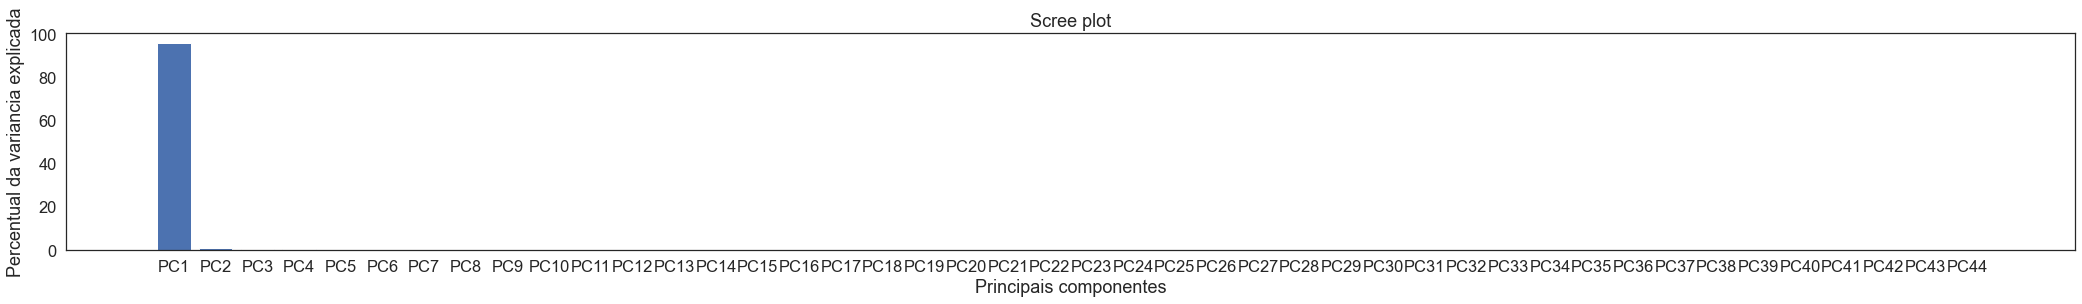

In [83]:
import random as rd
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=[36, 4])
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentual da variancia explicada')
plt.xlabel('Principais componentes')
plt.title('Scree plot')
plt.show()

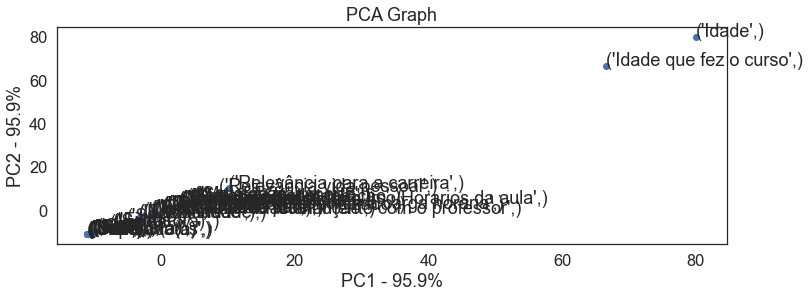

In [92]:
pca_df = pd.DataFrame(pca_data, index=[df.drop('Desistencia', axis = 1)], columns=labels)

plt.figure(figsize=[12, 4])
plt.scatter(pca_df.PC1, pca_df.PC1)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[0]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC1.loc[sample]))

In [134]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
Caso,-2.557211,-1.655749,0.530353,-0.080871,-0.371218,0.181031,-0.169241,-0.212249,0.373205,0.687973,...,-0.026910,-0.044727,0.023254,-0.003059,0.007173,-0.001328,-0.000159,0.000925,7.874722e-05,1.016548e-15
Idade,80.017885,-3.440351,4.206906,-1.003505,-1.054362,0.522078,0.008988,-0.521218,-0.586915,-0.162993,...,-0.012631,-0.004971,-0.001627,-0.001360,-0.001179,0.000415,-0.000228,-0.000559,2.104046e-05,1.332268e-14
Renda,0.782743,-1.186013,-1.689249,-1.895165,-1.065439,-0.551133,3.123756,2.033651,-1.151560,-1.001614,...,-0.010169,-0.022780,0.004069,-0.002499,0.004678,0.000053,0.000810,0.000268,1.274530e-05,-5.384582e-15
Sexo,-5.162124,0.421346,0.407576,-0.086098,-0.076482,-0.261077,-0.328125,-0.289351,-0.169631,0.411764,...,-0.052277,-0.045617,-0.008299,-0.004141,0.005905,-0.002783,-0.001288,-0.001211,3.042073e-05,-4.024558e-16
Solteiro(a),-7.313697,0.450221,0.194937,-0.082318,-0.264673,-0.247631,0.010398,-0.041867,-0.001656,0.045038,...,0.036258,-0.025641,-0.101326,0.013397,-0.066346,0.125485,-0.047209,-0.005010,-6.441512e-03,-3.552714e-15
Casado(a),-10.866876,0.767553,0.762081,-0.574702,-0.268009,-0.174237,-0.232828,-0.200770,0.110902,-0.168288,...,0.134044,-0.008611,0.030172,-0.150849,-0.079269,0.127379,-0.049552,-0.005582,-6.735872e-03,-4.371503e-15
Separado(a),-11.040858,0.759904,0.619508,-0.519055,-0.347887,-0.241744,-0.173520,-0.142607,0.083560,-0.106119,...,0.063896,-0.113000,-0.083782,-0.018209,-0.095252,-0.097966,-0.055329,0.115631,-9.370297e-03,7.216450e-16
Outro Status,-11.043407,0.751684,0.574008,-0.523534,-0.341138,-0.243638,-0.172142,-0.129370,0.093680,-0.100873,...,0.077414,-0.098297,-0.084690,0.010172,-0.085816,-0.108790,-0.051666,-0.115532,-8.274813e-03,-4.732326e-15
Filhos,-7.004165,0.515448,0.513294,-0.329776,-0.220020,-0.197991,-0.149420,-0.074781,-0.012909,-0.107419,...,0.319163,0.100366,-0.186811,0.361772,0.092205,0.022889,0.009888,0.006851,7.044857e-04,-8.743006e-16
Escolaridade,-3.345303,0.234296,0.329057,-0.303509,-0.278610,-0.073933,-0.123340,-0.157764,0.038550,0.084897,...,-0.057054,-0.009320,0.021677,0.016494,-0.002923,-0.004784,0.009130,0.000279,4.971169e-05,-1.370432e-15


In [132]:
loading_scores = pd.Series(pca_df['PC2'])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10])

Idade que fez o curso                       7.124552
Tempo de estudo                            -5.468111
Duração total                              -3.558848
Idade                                      -3.440351
Meio de transporte                         -3.303280
Caso                                       -1.655749
Dificuldade de conciliar a carga horaria    1.467040
Distância                                   1.289361
Facilidade de locomoção                     1.270070
Renda                                      -1.186013
Name: PC2, dtype: float64


## Separando em conjuntos de treino e teste (random_state=42)
## Padronizando para os conjunto de treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.fit_transform(X_test)

## Importando o PCA
* from sklearn.decomposition import PCA, utilizando 13 componentes principais

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=len(X.columns))

In [9]:
pca.fit(X_train_pad)

PCA(n_components=44)

In [10]:
X_train_pca = pca.transform(X_train_pad)

In [11]:
np.shape(X_train_pca)

(216, 44)

In [12]:
X_train_pca

array([[-2.77955547e+00,  9.57894938e-01,  9.04224668e-01, ...,
        -4.79352540e-02,  1.53050053e-15, -4.31488261e-16],
       [-9.92475095e-01,  2.63295254e-01, -1.53538846e-01, ...,
         2.03931364e-01, -6.00399238e-16, -1.51170134e-16],
       [ 6.44687201e-01,  8.27703856e-01,  7.64789662e-01, ...,
        -4.06118584e-01, -9.07520840e-16,  6.01648157e-16],
       ...,
       [-6.42484612e-01, -2.34269136e-01,  8.01489561e-01, ...,
        -2.31328516e-01,  3.45021192e-16, -5.98074177e-16],
       [-1.43994007e+00, -4.43565386e-01,  3.26249216e-04, ...,
        -3.42345727e-01,  8.75371472e-16, -2.25166661e-16],
       [-1.69283356e-01, -8.74657227e-02,  1.58866024e+00, ...,
         1.71421903e-01,  3.46944695e-16, -9.14016190e-17]])

In [13]:
X_test_pca = pca.transform(X_test_pad)

In [14]:
var_explicada = pca.explained_variance_ratio_

In [15]:
var_explicada.sum()

1.0000000000000002

## Scree Plot

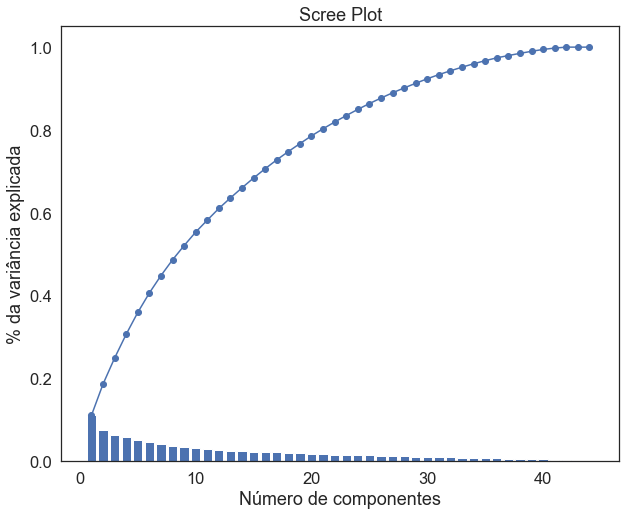

In [16]:
componentes = list(i for i in range(1,45))
plt.figure(figsize=[10, 8])
sns.set(font_scale=1.5, style='white')
plt.title('Scree Plot')
plt.xlabel('Número de componentes')
plt.ylabel('% da variância explicada')
plt.bar(componentes, var_explicada)
plt.plot(componentes, np.cumsum(var_explicada), marker='o')

## Executando o PCA

In [17]:
pca = PCA(n_components=10)
pca.fit(X_train_pad)

PCA(n_components=10)

In [18]:
X_train_pca = pca.transform(X_train_pad)
X_test_pca = pca.transform(X_test_pad)

In [19]:
np.shape(X_train_pca)

(216, 10)

### Classificando o conjunto utilizando Redes Neurais tanto para o conjunto padronizado quanto para o construído por PCA

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [21]:
ann = MLPClassifier(max_iter = 10000)

In [22]:
ann.fit(X_train_pad, y_train)

MLPClassifier(max_iter=10000)

In [23]:
y_pred_pad = ann.predict(X_test_pad)

In [24]:
print(classification_report(y_test, y_pred_pad))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        43
           1       0.79      0.60      0.68        50

    accuracy                           0.70        93
   macro avg       0.71      0.71      0.70        93
weighted avg       0.72      0.70      0.70        93



In [25]:
ann.fit(X_train_pca, y_train)

MLPClassifier(max_iter=10000)

In [26]:
y_pred_pca = ann.predict(X_test_pca)

In [27]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        43
           1       0.70      0.62      0.66        50

    accuracy                           0.66        93
   macro avg       0.66      0.66      0.66        93
weighted avg       0.66      0.66      0.66        93



In [29]:
df_pca = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

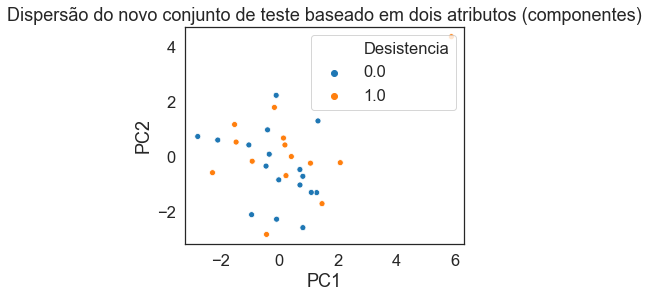

In [50]:
plt.figure(figsize=[5, 4])
plt.title('Dispersão do novo conjunto de teste baseado em dois atributos (componentes)')
sns.scatterplot(data=df_pca, x='PC1', y='PC2' , hue=y_test, palette='tab10')
plt.show()

## Utilizando Floresta Aleatória para verificação da importância dos atributos

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=10000)

In [34]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [35]:
rf.feature_importances_

array([3.08247387e-01, 3.25064359e-02, 1.79103788e-02, 6.90617757e-03,
       1.85595341e-03, 2.06409395e-03, 9.21105565e-05, 1.76635204e-04,
       1.17288760e-03, 5.24701726e-03, 2.73561769e-02, 1.74019167e-02,
       4.89587060e-03, 3.92444332e-02, 8.63089175e-02, 3.06165216e-02,
       2.75989104e-02, 7.21466980e-03, 2.81780428e-04, 7.00960946e-03,
       1.68471759e-03, 5.73614320e-03, 2.21484737e-03, 4.02688435e-03,
       0.00000000e+00, 2.68676956e-02, 8.84159902e-03, 6.25799644e-03,
       1.39859603e-02, 3.65844080e-03, 2.07671171e-02, 2.00078814e-02,
       2.01908356e-02, 2.60564644e-02, 1.96848474e-02, 1.22415738e-02,
       1.64772656e-02, 3.47723169e-02, 1.96708997e-02, 2.57626238e-02,
       1.97612468e-02, 1.45072052e-02, 1.11298604e-02, 4.15876936e-02])

In [36]:
feat_labels = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[f],
                           importances[indices[f]]))

 1) Caso                           0.308247
 2) Idade                          0.086309
 3) Renda                          0.041588
 4) Sexo                           0.039244
 5) Solteiro(a)                    0.034772
 6) Casado(a)                      0.032506
 7) Separado(a)                    0.030617
 8) Outro Status                   0.027599
 9) Filhos                         0.027356
10) Escolaridade                   0.026868
11) Escolaridade mãe               0.026056
12) Escolaridade pai               0.025763
13) Inglês                         0.020767
14) Idade que fez o curso          0.020191
15) Tempo de estudo                0.020008
16) Duração total                  0.019761
17) Valor da mensalidade           0.019685
18) Sit1                           0.019671
19) Sit2                           0.017910
20) Sit3                           0.017402
21) Sit4                           0.016477
22) Sit5                           0.014507
23) Sit16                       

## Validação cruzada
* K-fold (estratificado) e Leave-one-out, utilizando Floresta aleatória como estimador
* from sklearn.model_selection import StratifiedKFold, LeaveOneOut

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut

In [38]:
skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [39]:
rf = RandomForestClassifier(n_estimators=100)

In [40]:
cv1 = cross_val_score(estimator=rf, X=X, y=y, cv=skf)

In [41]:
cv1

array([0.80645161, 0.93548387, 0.90322581, 0.90322581, 0.96774194,
       1.        , 0.93548387, 1.        , 1.        , 1.        ])

In [42]:
cv1.mean()

0.9451612903225806

In [43]:
cv1.std()

0.05956833971812708

In [44]:
cv2 = cross_val_score(estimator=rf, X=X, y=y, cv=loo)

In [45]:
cv2

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [46]:
4/len(X)

0.012944983818770227

In [47]:
1-4/len(X)

0.9870550161812298

In [48]:
cv2.mean()

0.9741100323624595